# Logistic Regression

## Importing Libraries

In [44]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the data

In [45]:
# Importing Data
data = pd.read_csv('data_cleaned.csv')
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


### Segregating variables: Independent and Dependent Variables

In [46]:
#seperating independent and dependent variables
x = data.drop(['Survived'], axis=1)
y = data['Survived']
x.shape, y.shape

((891, 24), (891,))

### Splitting the data into train set and the test set

In [47]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

## Normalising using min_max_scalar

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [49]:
cols = train_x.columns
cols

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [50]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.371701,0.024350,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.334004,0.016908,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.396833,0.015127,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.786378,0.152164,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.334004,0.412821,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [51]:
test_x_scaled = scaler.fit_transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=cols)
test_x_scaled.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.448029,0.143462,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.405018,0.129995,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.415041,0.014110,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.390681,0.025374,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.419355,0.054164,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Implementing Logistic Regression

In [52]:
# importing Logistic Regression and metric F1-score
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

In [53]:
# Creating instance of Logistic Regression
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

/home/appa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Making predictions using predict function

In [54]:
# Predict over the Train
train_predict = logreg.predict(train_x)
train_predict

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,

In [55]:
# Calculating f1-score
k = f1_score(train_predict, train_y)
print('Training f1_score ', k)

Training f1_score  0.7514910536779325


In [56]:
# Predict over the Test set and find f1_score
test_predict = logreg.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test f1_score  ',k)

Test f1_score   0.736842105263158


## Making predictions using predict_proba function

In [57]:
# Predicting over the train
train_predict = logreg.predict_proba(train_x)
train_predict

array([[0.51858313, 0.48141687],
       [0.90645347, 0.09354653],
       [0.87283373, 0.12716627],
       ...,
       [0.22637072, 0.77362928],
       [0.31396804, 0.68603196],
       [0.04407185, 0.95592815]])

In [58]:
train_preds = train_predict[:,1]
train_preds

array([0.48141687, 0.09354653, 0.12716627, 0.7773143 , 0.63099266,
       0.11671949, 0.84464407, 0.77380645, 0.53469789, 0.08352594,
       0.10614871, 0.08552664, 0.12424851, 0.09642029, 0.60804238,
       0.08454679, 0.30750122, 0.12038283, 0.0717093 , 0.2856291 ,
       0.10262162, 0.21845875, 0.07127753, 0.58976253, 0.09038466,
       0.51376573, 0.08538071, 0.55648109, 0.60345098, 0.12846687,
       0.82058228, 0.08556151, 0.58608779, 0.13654544, 0.02238058,
       0.57530329, 0.21812815, 0.12566029, 0.058711  , 0.28493543,
       0.84163951, 0.39125518, 0.2029149 , 0.70615069, 0.48005992,
       0.94316441, 0.3702169 , 0.22111878, 0.16750474, 0.89284396,
       0.13269578, 0.63883387, 0.23850928, 0.61035151, 0.34059496,
       0.6461275 , 0.77874232, 0.29225432, 0.10936175, 0.29887389,
       0.58415201, 0.29225432, 0.1244865 , 0.45739665, 0.10280795,
       0.97630083, 0.11712873, 0.08552664, 0.86404177, 0.66345163,
       0.93075312, 0.74858536, 0.89826307, 0.44887075, 0.84182

In [59]:
# Setting a threshold
for i in range(0,len(train_preds)):
    if(train_preds[i]>0.55):
        train_preds[i] = 1
    else:
        train_preds[i] = 0 

In [60]:
# Calculating the f1 score
k = f1_score(train_preds, train_y)
print('Training f1_score',k)

Training f1_score 0.7366255144032922


## Confussion Matrix

In [61]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(test_y, test_predict)
print(cf)

[[127  17]
 [ 23  56]]


In [62]:
from sklearn.metrics import classification_report as rep
print(rep(test_y, test_predict))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       144
           1       0.77      0.71      0.74        79

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223



## Parameters of Logistic Regression

In [63]:
# printing the coefficents
logreg.coef_

array([[-0.03564979,  0.00289132,  1.01762799,  0.15017792, -1.08130208,
         1.18957198, -1.10306814,  0.84963248,  1.06226228,  0.35225106,
        -0.67714878, -0.78800427, -0.28585445, -0.42663449,  0.12380765,
         0.59915986, -0.1855938 ,  0.21181607, -0.35325674, -0.14156369,
        -0.16786551,  0.14130248,  0.23545986, -0.29025849]])

## Plotting the coefficents

Text(0.5, 1.0, ' Coefficient plot ')

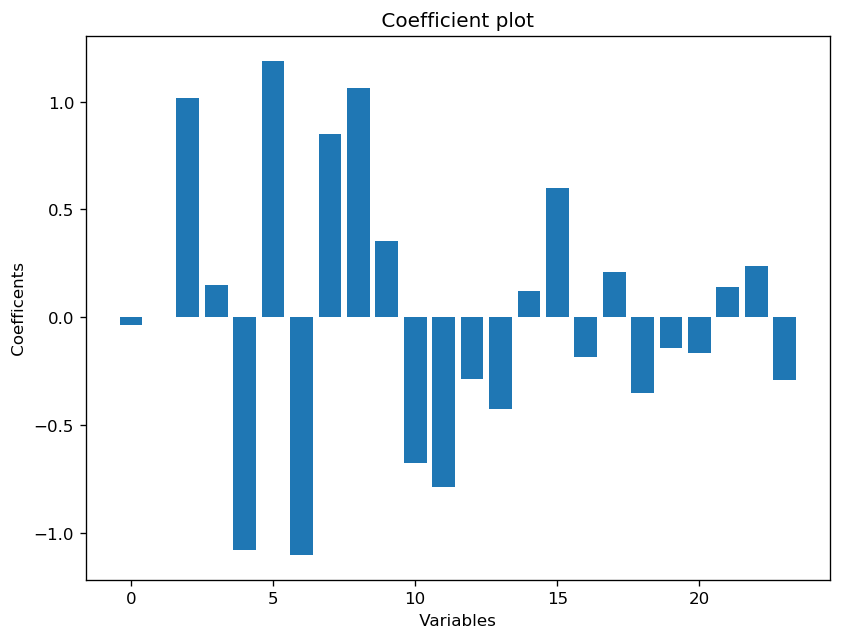

In [64]:
plt.figure(figsize = (8,6), dpi = 120, facecolor = 'w', edgecolor = 'green')
x = range(len(train_x.columns))
c = logreg.coef_.reshape(-1)
plt.bar(x,c)
plt.xlabel(" Variables ")
plt.ylabel(" Coefficents ")
plt.title(' Coefficient plot ')

In [65]:
Coefficents = pd.DataFrame({
    'Variable' : train_x.columns,
    'coefficent':abs(c)
})
Coefficents.head()

,Variable,coefficent
0,Age,0.035650
1,Fare,0.002891
2,Pclass_1,1.017628
3,Pclass_2,0.150178
4,Pclass_3,1.081302


In [66]:
# Selecting variables with high coefficent
sig_var = Coefficents[Coefficents.coefficent > 0.3]

In [67]:
subset = data[sig_var['Variable'].values]
subset.head()

,Pclass_1,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_8,Parch_1,Parch_4
0,0,1,0,1,0,1,0,0,0,0,0,0
1,1,0,1,0,0,1,0,0,0,0,0,0
2,0,1,1,0,1,0,0,0,0,0,0,0
3,1,0,1,0,0,1,0,0,0,0,0,0
4,0,1,0,1,1,0,0,0,0,0,0,0


In [69]:
# Using train test split function
train_x,test_x,train_y,test_y = train_test_split(subset,y, random_state = 56)

## Implementing Logistic Regression

In [72]:
# Creating instance of Logistic Regression
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

LogisticRegression()

## Making predictions using predict function

In [73]:
# Predicting over the Train
train_predict = logreg.predict(train_x)
k = f1_score(train_predict, train_y)
print('Training f1_score ', k)

Training f1_score  0.7011952191235059


Text(0.5, 1.0, 'Normalized Coefficient plot')

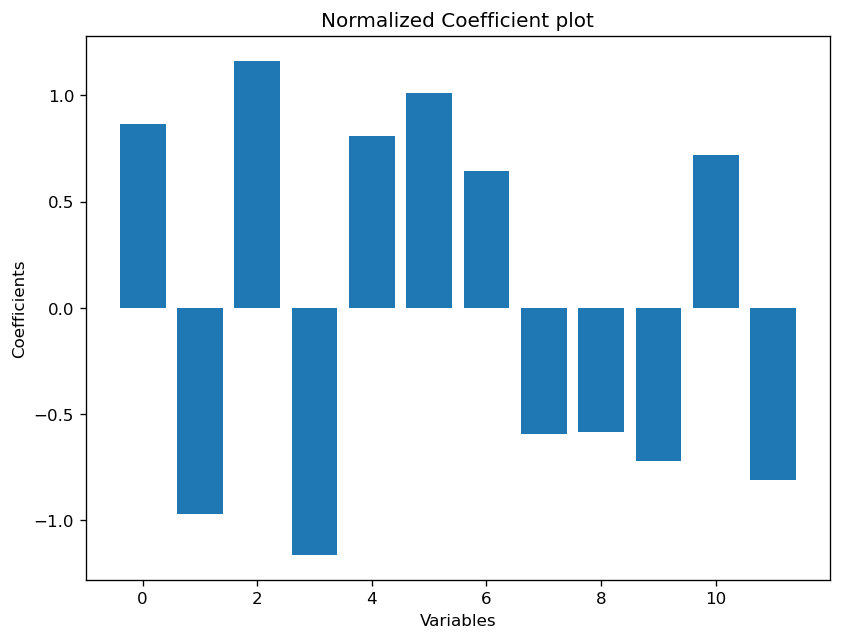

In [75]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = logreg.coef_.reshape(-1)
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')